In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
X_train = np.load('./x_train.npy')
X_val = np.load('./x_val.npy')
y_train = np.load('./y_train.npy')
y_val = np.load('./y_val.npy')

0


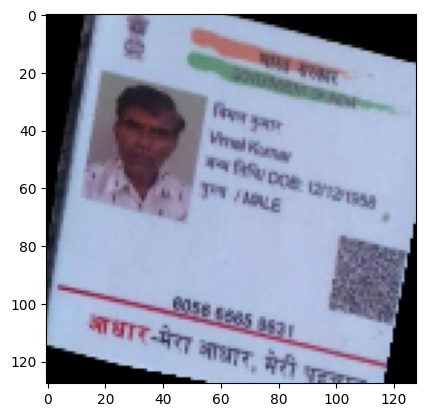

In [3]:
print(y_train[10])
plt.imshow(X_train[10])

0


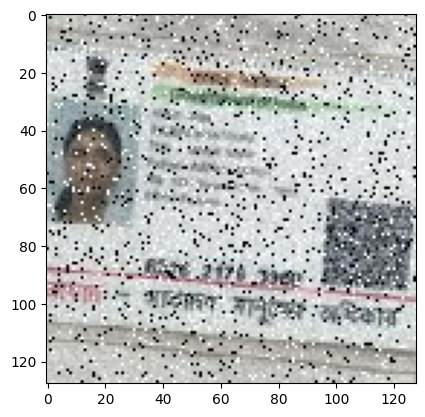

In [4]:
print(y_val[10])
plt.imshow(X_val[10])

In [8]:
model = keras.Sequential([
    Input(shape=(128,128,3)),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(2),
    Conv2D(128,3,padding='same',activation='relu'),
    MaxPooling2D(2),
    Conv2D(256,3,padding='same',activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(256,activation='relu'),
    keras.layers.Dropout(0.3),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [9]:
model.compile(optimizer='Adam',metrics=['accuracy'],loss=keras.losses.binary_crossentropy)

In [10]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=20,batch_size=32)

Epoch 1/20
70/70 [==============================] - 3s 28ms/step - loss: 2.6448 - accuracy: 0.8579 - val_loss: 0.0688 - val_accuracy: 0.9865
Epoch 2/20
70/70 [==============================] - 1s 19ms/step - loss: 0.0634 - accuracy: 0.9843 - val_loss: 0.0566 - val_accuracy: 0.9776
Epoch 3/20
70/70 [==============================] - 1s 19ms/step - loss: 0.0704 - accuracy: 0.9839 - val_loss: 0.0553 - val_accuracy: 0.9910
Epoch 4/20
70/70 [==============================] - 1s 19ms/step - loss: 0.0897 - accuracy: 0.9767 - val_loss: 0.1048 - val_accuracy: 0.9821
Epoch 5/20
70/70 [==============================] - 1s 19ms/step - loss: 0.0733 - accuracy: 0.9812 - val_loss: 0.0541 - val_accuracy: 0.9865
Epoch 6/20
70/70 [==============================] - 1s 19ms/step - loss: 0.0505 - accuracy: 0.9892 - val_loss: 0.0569 - val_accuracy: 0.9910
Epoch 7/20
70/70 [==============================] - 1s 19ms/step - loss: 0.0580 - accuracy: 0.9848 - val_loss: 0.0266 - val_accuracy: 0.9955
Epoch 8/20
70

In [11]:
keras.models.save_model(model,"./document_classifier.h5")